<a href="https://colab.research.google.com/github/AriFatih/ML-Assignments/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [183]:
df = pd.read_csv('Churn_Modelling.csv')

In [184]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [186]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [188]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

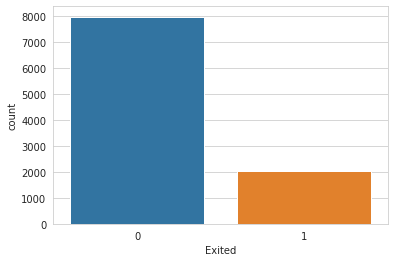

In [189]:
sns.countplot(df["Exited"]);

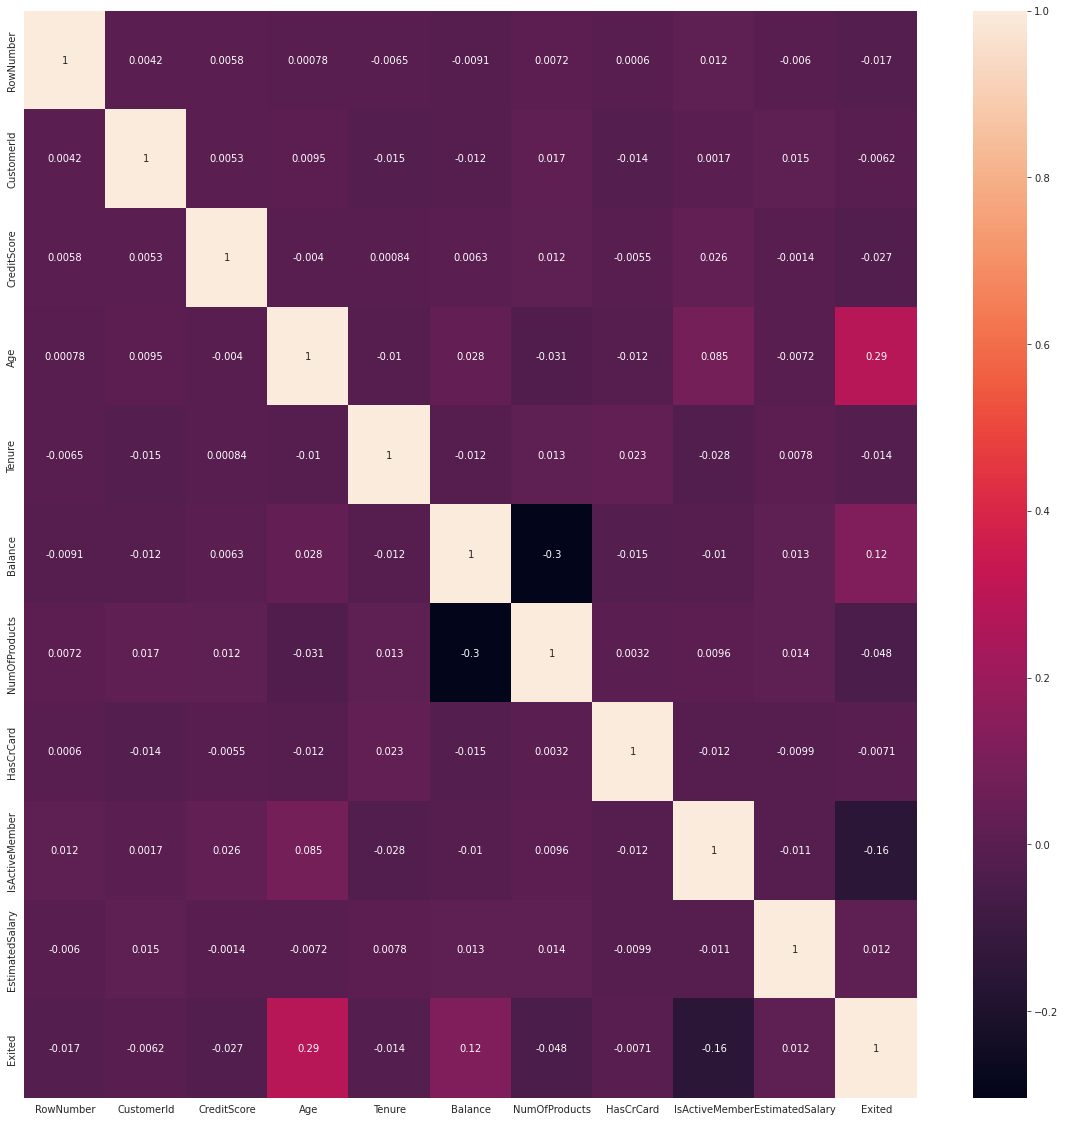

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [190]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

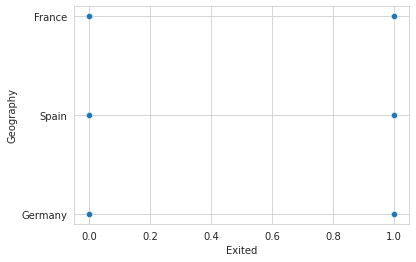

In [191]:
sns.scatterplot(x = 'Exited',y = 'Geography', data = df);

In [192]:
drop_list = ["Geography", "RowNumber", "CustomerId", "Surname"]

In [193]:
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)

In [194]:
df=df.drop(drop_list, axis=1)

In [195]:
df.shape

(10000, 10)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [197]:
df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [25]:
seed = 42

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = seed)

In [27]:
scaler = StandardScaler()

In [28]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[ 1.058568  ,  0.90750738,  1.71508648, ...,  0.64104192,
        -1.030206  ,  1.04208392],
       [ 0.91362605,  0.90750738, -0.65993547, ...,  0.64104192,
        -1.030206  , -0.62355635],
       [ 1.07927399, -1.10191942, -0.18493108, ...,  0.64104192,
         0.97067965,  0.30812779],
       ...,
       [ 0.16821031, -1.10191942, -0.18493108, ...,  0.64104192,
         0.97067965, -0.55808767],
       [ 0.37527024,  0.90750738, -0.37493284, ...,  0.64104192,
        -1.030206  , -1.35149956],
       [ 1.56586482,  0.90750738,  1.14508121, ..., -1.55996038,
         0.97067965, -1.02692216]])

# Modelling & Model Performance

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


In [31]:
X_train.shape

(8000, 9)

In [32]:
X_test.shape

(2000, 9)

## without class_weigth

> Indented block



### Create The Model

In [88]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [89]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 12)                120       
                                                                 
 dense_49 (Dense)            (None, 16)                208       
                                                                 
 dense_50 (Dense)            (None, 12)                204       
                                                                 
 dense_51 (Dense)            (None, 1)                 13        
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, verbose=1)

Epoch 1/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5182 - accuracy: 0.7904 - recall: 0.0210 - val_loss: 0.4270 - val_accuracy: 0.8213 - val_recall: 0.0855
Epoch 2/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.8147 - recall: 0.1773 - val_loss: 0.4039 - val_accuracy: 0.8375 - val_recall: 0.2763
Epoch 3/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8243 - recall: 0.2571 - val_loss: 0.3905 - val_accuracy: 0.8413 - val_recall: 0.2829
Epoch 4/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8306 - recall: 0.2957 - val_loss: 0.3770 - val_accuracy: 0.8500 - val_recall: 0.2961
Epoch 5/500
180/180 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8406 - recall: 0.3369 - val_loss: 0.3654 - val_accuracy: 0.8562 - val_recall: 0.3355
Epoch 6/500
180/180 [==============================] - 1s 3ms/step - loss: 0.3831 - accuracy: 0

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [91]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
495,0.311,0.868,0.487,0.355,0.848,0.480
496,0.311,0.870,0.497,0.345,0.850,0.461
497,0.312,0.868,0.499,0.345,0.870,0.434
498,0.312,0.869,0.491,0.345,0.866,0.447
499,0.310,0.870,0.491,0.344,0.859,0.441


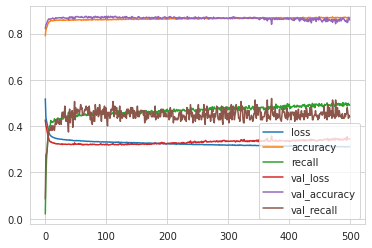

In [92]:
loss_df.plot();

In [93]:
model.evaluate(X_test, y_test, verbose=0)

[0.3713841736316681, 0.8475000262260437, 0.42751842737197876]

In [94]:
loss, accuracy, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)
print("recall : ", recall)

loss :  0.3713841736316681
accuracy :  0.8475000262260437
recall :  0.42751842737197876


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [95]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [96]:
tf.random.set_seed(seed)

model_weighted = Sequential()

model_weighted.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(12, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))

model_weighted.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [97]:
model_weighted.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, class_weight=class_weights, verbose=1)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 0.6328 - accuracy: 0.6662 - recall: 0.6691 - val_loss: 0.5930 - val_accuracy: 0.6988 - val_recall: 0.7039
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5839 - accuracy: 0.6978 - recall: 0.6962 - val_loss: 0.5725 - val_accuracy: 0.7038 - val_recall: 0.7039
Epoch 3/500
180/180 [==============================] - 1s 3ms/step - loss: 0.5656 - accuracy: 0.7078 - recall: 0.7118 - val_loss: 0.5412 - val_accuracy: 0.7200 - val_recall: 0.7303
Epoch 4/500
180/180 [==============================] - 1s 3ms/step - loss: 0.5464 - accuracy: 0.7099 - recall: 0.7368 - val_loss: 0.4830 - val_accuracy: 0.7800 - val_recall: 0.6842
Epoch 5/500
180/180 [==============================] - 1s 3ms/step - loss: 0.5271 - accuracy: 0.7307 - recall: 0.7240 - val_loss: 0.4811 - val_accuracy: 0.7663 - val_recall: 0.7171
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

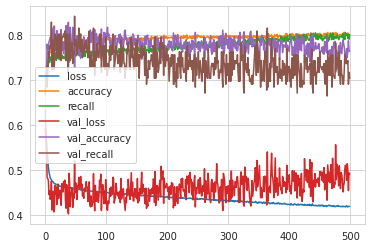

In [98]:
loss_df2.plot();

In [99]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.5057224631309509, 0.7515000104904175, 0.7149876952171326]

In [100]:
loss, accuracy, recall = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)
print("recall : ", recall)

loss :  0.5057224631309509
accuracy :  0.7515000104904175
recall :  0.7149876952171326


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [101]:
from tensorflow.keras.optimizers import Adam


In [102]:
tf.random.set_seed(seed)

model_lr0 = Sequential()

model_lr0.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model_lr0.add(Dense(16, activation = "relu"))
model_lr0.add(Dense(12, activation = "relu"))
model_lr0.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)

model_lr0.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [103]:
model_lr0.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, class_weight=class_weights, verbose=1)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 0.6328 - accuracy: 0.6662 - recall: 0.6691 - val_loss: 0.5930 - val_accuracy: 0.6988 - val_recall: 0.7039
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5839 - accuracy: 0.6978 - recall: 0.6962 - val_loss: 0.5725 - val_accuracy: 0.7038 - val_recall: 0.7039
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5656 - accuracy: 0.7078 - recall: 0.7118 - val_loss: 0.5412 - val_accuracy: 0.7200 - val_recall: 0.7303
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5464 - accuracy: 0.7099 - recall: 0.7368 - val_loss: 0.4830 - val_accuracy: 0.7800 - val_recall: 0.6842
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5271 - accuracy: 0.7307 - recall: 0.7240 - val_loss: 0.4811 - val_accuracy: 0.7663 - val_recall: 0.7171
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0

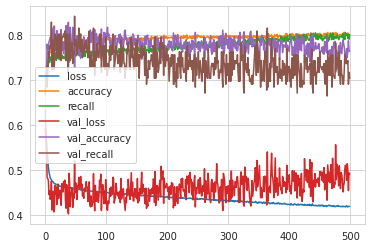

In [104]:
# The model with LR=0.001
loss_df0 = pd.DataFrame(model_lr0.history.history)
loss_df0.plot();

In [105]:
loss_lr001, accuracy_lr001,recall_lr001 = model_lr0.evaluate(X_test, y_test, verbose=0)
print("loss_lr001 : ", loss_lr001)
print("accuracy_lr001 : ", accuracy_lr001)
print("recall_lr001 : ", recall_lr001)

loss_lr001 :  0.5057224631309509
accuracy_lr001 :  0.7515000104904175
recall_lr001 :  0.7149876952171326


In [106]:
tf.random.set_seed(seed)

model_lr = Sequential()

model_lr.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model_lr.add(Dense(16, activation = "relu"))
model_lr.add(Dense(12, activation = "relu"))
model_lr.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)

model_lr.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [107]:
model_lr.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, class_weight=class_weights, verbose=1)

Epoch 1/500
180/180 [==============================] - 2s 7ms/step - loss: 0.6040 - accuracy: 0.6835 - recall: 0.6935 - val_loss: 0.5469 - val_accuracy: 0.7088 - val_recall: 0.7237
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5547 - accuracy: 0.7042 - recall: 0.7382 - val_loss: 0.4977 - val_accuracy: 0.7525 - val_recall: 0.7368
Epoch 3/500
180/180 [==============================] - 1s 3ms/step - loss: 0.5140 - accuracy: 0.7281 - recall: 0.7517 - val_loss: 0.4730 - val_accuracy: 0.7613 - val_recall: 0.7697
Epoch 4/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4934 - accuracy: 0.7479 - recall: 0.7476 - val_loss: 0.3962 - val_accuracy: 0.8238 - val_recall: 0.6184
Epoch 5/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4867 - accuracy: 0.7664 - recall: 0.7300 - val_loss: 0.4578 - val_accuracy: 0.7800 - val_recall: 0.7632
Epoch 6/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4803 - accuracy: 0

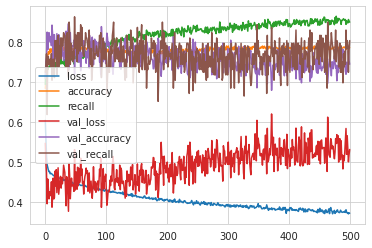

In [108]:
# The model with LR=0.003
loss_df3 = pd.DataFrame(model_lr.history.history)
loss_df3.head()
loss_df3.plot();



In [109]:
tf.random.set_seed(seed)

model_lr2 = Sequential()

model_lr2.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model_lr2.add(Dense(16, activation = "relu"))
model_lr2.add(Dense(12, activation = "relu"))
model_lr2.add(Dense(1, activation = "sigmoid"))

opt2 = Adam(lr = 0.005)

model_lr2.compile(optimizer = opt2, loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [110]:
model_lr2.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, class_weight=class_weights, verbose=1)

Epoch 1/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5925 - accuracy: 0.6888 - recall: 0.7003 - val_loss: 0.5182 - val_accuracy: 0.7375 - val_recall: 0.7303
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.7207 - recall: 0.7442 - val_loss: 0.4812 - val_accuracy: 0.7600 - val_recall: 0.7961
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.7447 - recall: 0.7361 - val_loss: 0.4423 - val_accuracy: 0.8037 - val_recall: 0.7500
Epoch 4/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4906 - accuracy: 0.7579 - recall: 0.7341 - val_loss: 0.3944 - val_accuracy: 0.8425 - val_recall: 0.5987
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.4875 - accuracy: 0.7728 - recall: 0.7165 - val_loss: 0.4481 - val_accuracy: 0.7912 - val_recall: 0.7566
Epoch 6/500
180/180 [==============================] - 1s 3ms/step - loss: 0.4821 - accuracy: 0

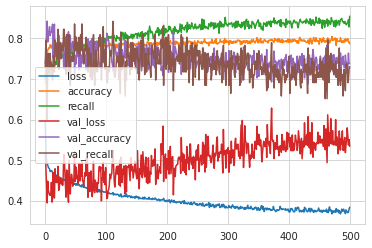

In [111]:
# The model with LR=0.005
loss_df4 = pd.DataFrame(model_lr2.history.history)
loss_df4.head()
loss_df4.plot();

In [112]:
# It seems LR=0.001 is the optimum one

### Add Dropout Layer

In [113]:
from tensorflow.keras.layers import Dropout

In [114]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [115]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, class_weight=class_weights, verbose = 1)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 0.7051 - accuracy: 0.5500 - recall: 0.4811 - val_loss: 0.6830 - val_accuracy: 0.5638 - val_recall: 0.8092
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6860 - accuracy: 0.5833 - recall: 0.4499 - val_loss: 0.6675 - val_accuracy: 0.6225 - val_recall: 0.7566
Epoch 3/500
180/180 [==============================] - 1s 6ms/step - loss: 0.6773 - accuracy: 0.6079 - recall: 0.4574 - val_loss: 0.6409 - val_accuracy: 0.6775 - val_recall: 0.7171
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6657 - accuracy: 0.6524 - recall: 0.4716 - val_loss: 0.6298 - val_accuracy: 0.6750 - val_recall: 0.7171
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6686 - accuracy: 0.6568 - recall: 0.4202 - val_loss: 0.6304 - val_accuracy: 0.6825 - val_recall: 0.7368
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6550 - accuracy: 0

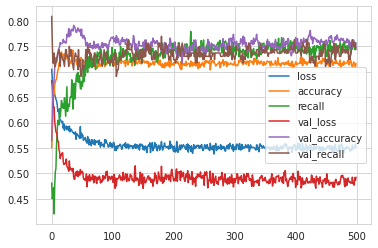

In [116]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [117]:
loss_dropout_05, accuracy_dropout_05,recall_dropout_05 = model.evaluate(X_test, y_test, verbose=0)
print("loss_dropout_05 : ", loss_dropout_05)
print("accuracy_dropout_05 : ", accuracy_dropout_05)
print("recall_dropout_05 : ", recall_dropout_05)

loss_dropout_05 :  0.4978131949901581
accuracy_dropout_05 :  0.7549999952316284
recall_dropout_05 :  0.7542997598648071


In [118]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1203  390]
 [ 100  307]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.83      0.76      0.77      2000



### Add Early Stop

In [152]:
from tensorflow.keras.callbacks import EarlyStopping

In [153]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [154]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [155]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, verbose = 1, class_weight=class_weights,
          callbacks = [early_stop])

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 0.6328 - accuracy: 0.6662 - recall: 0.6691 - val_loss: 0.5930 - val_accuracy: 0.6988 - val_recall: 0.7039
Epoch 2/500
180/180 [==============================] - 1s 3ms/step - loss: 0.5839 - accuracy: 0.6978 - recall: 0.6962 - val_loss: 0.5725 - val_accuracy: 0.7038 - val_recall: 0.7039
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5656 - accuracy: 0.7078 - recall: 0.7118 - val_loss: 0.5412 - val_accuracy: 0.7200 - val_recall: 0.7303
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5464 - accuracy: 0.7099 - recall: 0.7368 - val_loss: 0.4830 - val_accuracy: 0.7800 - val_recall: 0.6842
Epoch 5/500
180/180 [==============================] - 1s 3ms/step - loss: 0.5271 - accuracy: 0.7307 - recall: 0.7240 - val_loss: 0.4811 - val_accuracy: 0.7663 - val_recall: 0.7171
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0

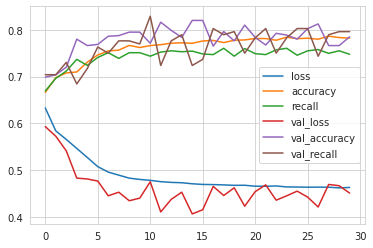

In [156]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [157]:
loss_earlyStop, accuracy_earlyStop, recall_earlyStop = model.evaluate(X_test, y_test, verbose=0)
print("loss_earlyStop : ", loss_earlyStop)
print("accuracy_earlyStop : ", accuracy_earlyStop)
print("recall_earlyStop : ", recall_earlyStop)

loss_earlyStop :  0.43355080485343933
accuracy_earlyStop :  0.8015000224113464
recall_earlyStop :  0.6830466985702515


#### Monitor the "val_loss" as metric

In [158]:
val_loss = {'EarlyStop': loss_earlyStop, 'DropOut_005': loss_dropout_05, 'LearningRate0001' : loss_lr001}
val_recall = {'EarlyStop':recall_earlyStop, 'DropOut_005': recall_dropout_05, 'LearningRate0001' : recall_lr001}
val_accuracy = {'EarlyStop' : accuracy_earlyStop, 'DropOut_005': accuracy_dropout_05, 'LearningRate0001' :accuracy_lr001}

val_loss

{'DropOut_005': 0.4978131949901581,
 'EarlyStop': 0.43355080485343933,
 'LearningRate0001': 0.5057224631309509}

#### Monitor the "val_recall" as metric

In [159]:
val_recall

{'DropOut_005': 0.7542997598648071,
 'EarlyStop': 0.6830466985702515,
 'LearningRate0001': 0.7149876952171326}

#### Monitor the "val_accuracy" as metric

In [160]:
val_accuracy

{'DropOut_005': 0.7549999952316284,
 'EarlyStop': 0.8015000224113464,
 'LearningRate0001': 0.7515000104904175}

## GridSearchCV

In [165]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from keras.wrappers.scikit_learn import KerasClassifier

In [166]:
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 12, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy', 'Recall'])
    return classifier

In [167]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [170]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 500)

parameters = {'batch_size': [40, 60],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, class_weight=class_weights, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

In [ ]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba)

# Final Model and Model Deployment

In [171]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [172]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(12, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy", "Recall"])

In [173]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 40, epochs = 500, class_weight=class_weights, verbose = 1)

Epoch 1/500
180/180 [==============================] - 1s 5ms/step - loss: 0.7051 - accuracy: 0.5500 - recall: 0.4811 - val_loss: 0.6830 - val_accuracy: 0.5638 - val_recall: 0.8092
Epoch 2/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6860 - accuracy: 0.5833 - recall: 0.4499 - val_loss: 0.6675 - val_accuracy: 0.6225 - val_recall: 0.7566
Epoch 3/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6773 - accuracy: 0.6079 - recall: 0.4574 - val_loss: 0.6409 - val_accuracy: 0.6775 - val_recall: 0.7171
Epoch 4/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6657 - accuracy: 0.6524 - recall: 0.4716 - val_loss: 0.6298 - val_accuracy: 0.6750 - val_recall: 0.7171
Epoch 5/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6686 - accuracy: 0.6568 - recall: 0.4202 - val_loss: 0.6304 - val_accuracy: 0.6825 - val_recall: 0.7368
Epoch 6/500
180/180 [==============================] - 1s 4ms/step - loss: 0.6550 - accuracy: 0

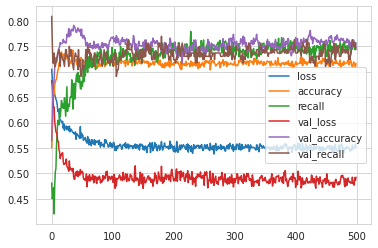

In [174]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [175]:
loss, accuracy, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)
print("recall : ", recall)

loss :  0.4978131949901581
accuracy :  0.7549999952316284
recall :  0.7542997598648071


In [176]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1203  390]
 [ 100  307]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.83      0.76      0.77      2000



In [177]:
model.save('model_churn.h5')

## Prediction

In [178]:
from tensorflow.keras.models import load_model

In [179]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("scaler_churn", "rb"))

In [198]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.000,1,1,1,101348.880


In [199]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[-0.32873352, -1.10191942,  0.29007331, -1.04143297, -1.22605881,
        -0.91025649,  0.64104192,  0.97067965,  0.02822301]])

In [200]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [201]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___